#Final Exam Part B - Code
Carson Dod xbh4ya

In [63]:
#Initial code here copied from Lab05 to import file to this particular file
from google.colab import drive
import pandas as pd
import numpy as np
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/2nd Year/Colab Notebooks/xdmgnd.csv'

df = pd.read_csv(file_path)
print(df.head())

Mounted at /content/drive
   Unnamed: 0  IYR  IMO RAILROAD    INCDTNO  IYR2  IMO2  RR2 INCDTNO2  IYR3  \
0           1    1    3      ATK     067106   NaN   NaN  NaN      NaN     1   
1           2    1    3     BNSF  MT0301100   NaN   NaN  NaN      NaN     1   
2           3    1    3     BNSF  MT0301103   NaN   NaN  NaN      NaN     1   
3           4    1    1     BNSF  AO0101104   NaN   NaN  NaN      NaN     1   
4           5    1    1     BNSF  DK0101112   NaN   NaN  NaN      NaN     1   

   ...  Longitud SIGNAL MOPERA  ADJUNCT1 ADJUNCT2  ADJUNCT3  SUBDIV  \
0  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
1  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
2  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
3  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
4  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   

         Type      Typeq  Cause  
0  Derailment  Passenger      T  
1  D

<ipython-input-63-640d36aa77bf>:14: DtypeWarning: Columns (100,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


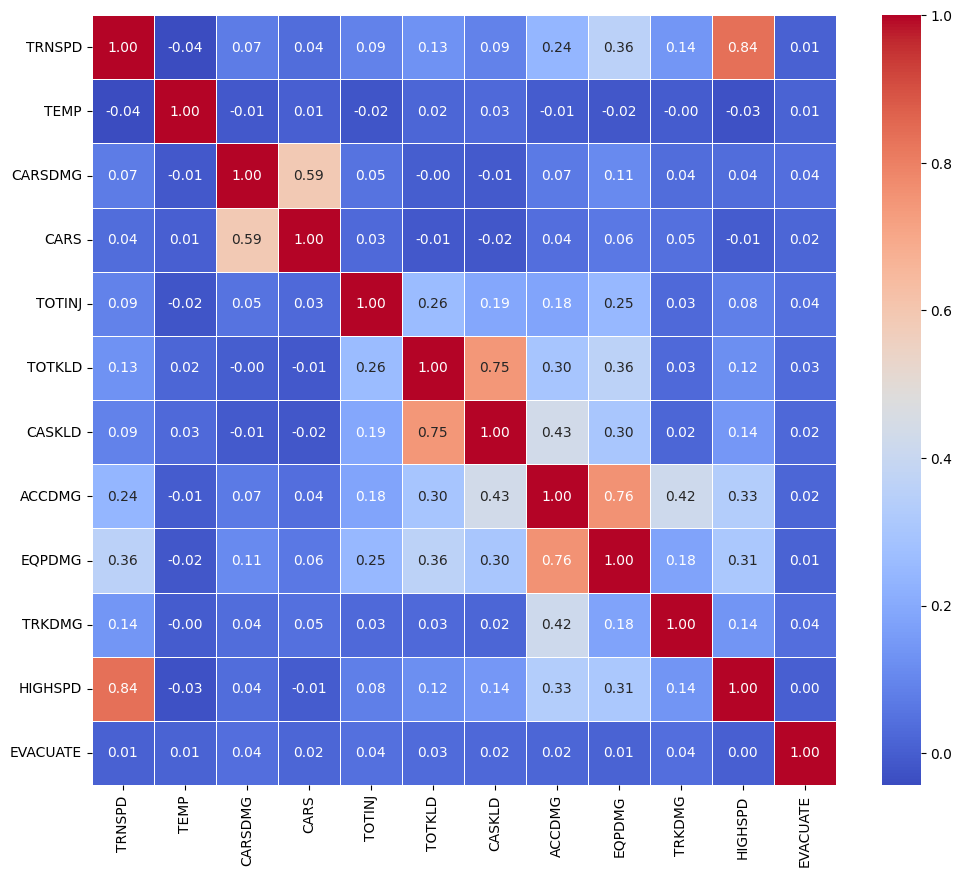

In [64]:
#1 and 2
correlation_col = ['TRNSPD', 'TEMP', 'CARSDMG', 'CARS', 'TOTINJ',
                       'TOTKLD', 'CASKLD', 'ACCDMG', 'EQPDMG',
                       'TRKDMG', 'HIGHSPD', 'EVACUATE']

matrix = df[correlation_col].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

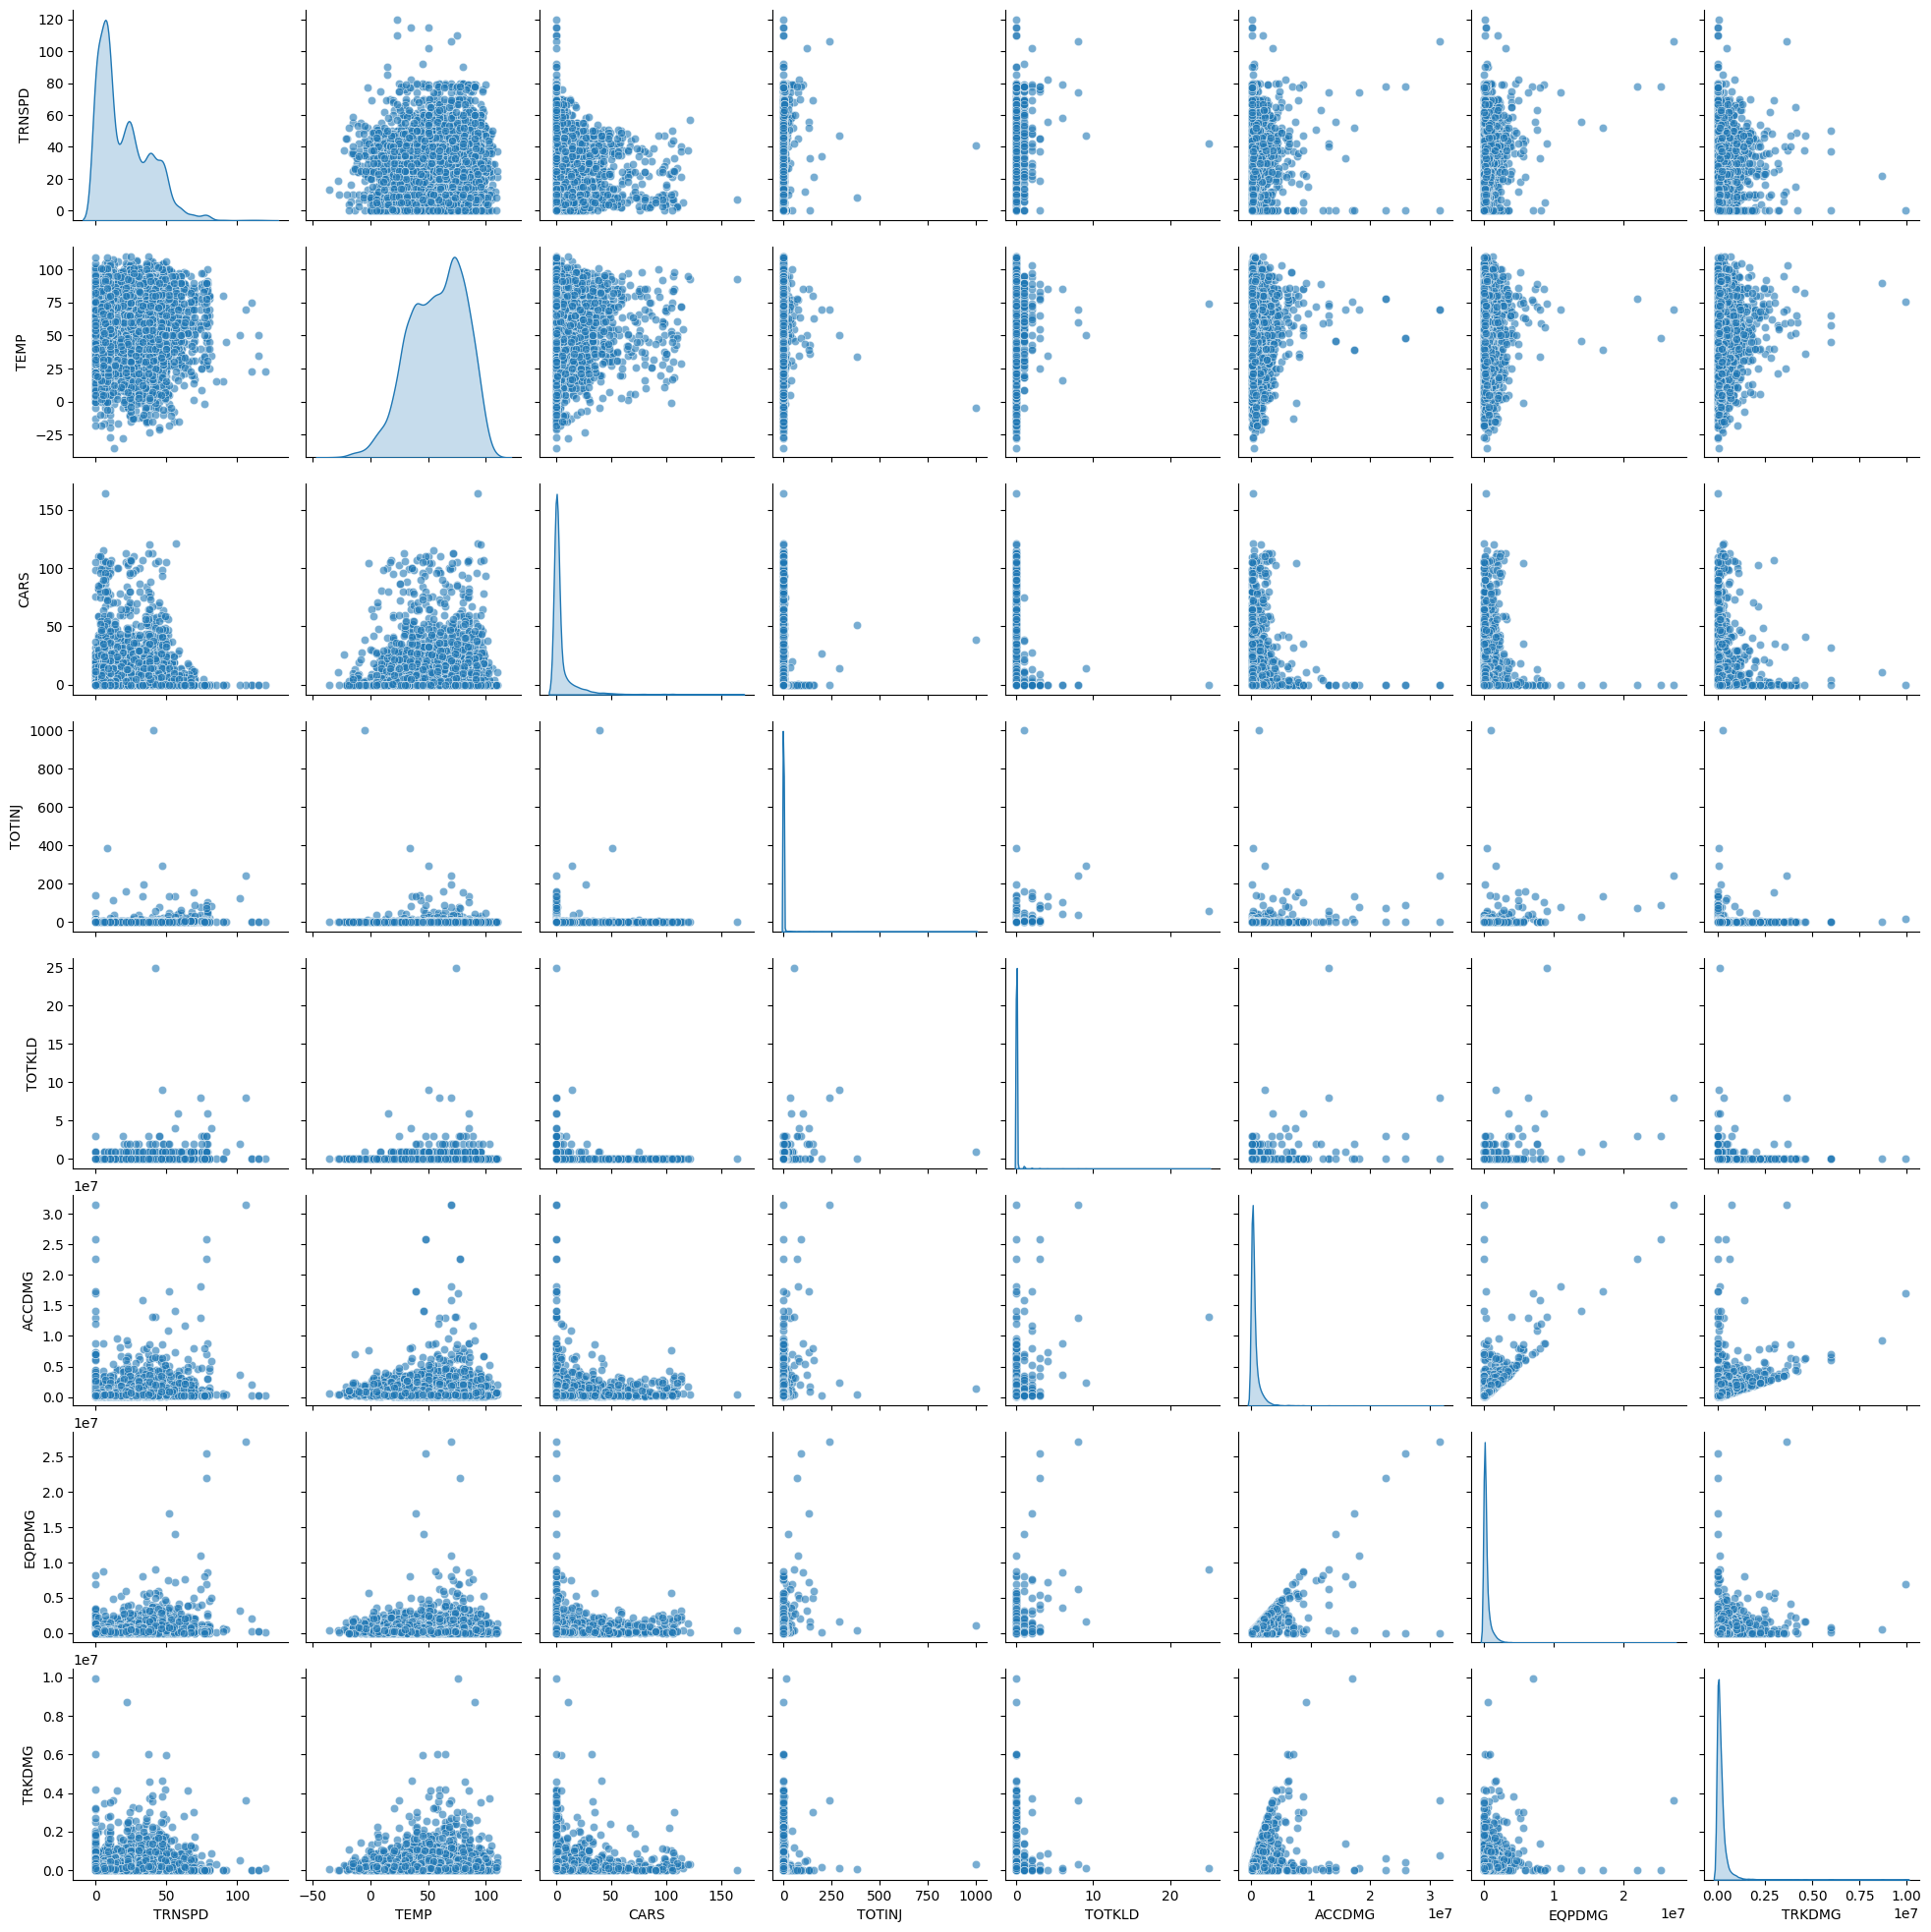

In [65]:
#3 and 4
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns
columns_to_plot = ['TRNSPD', 'TEMP', 'CARS', 'TOTINJ', 'TOTKLD', 'ACCDMG', 'EQPDMG', 'TRKDMG']

# Ensure the columns exist in the DataFrame
if all(col in df.columns for col in columns_to_plot):
    selected_data = df[columns_to_plot]

    # Creating scatterplot matrix
    sns.pairplot(selected_data, diag_kind="kde", plot_kws={'alpha': 0.6})
    plt.show()
else:
    missing_columns = [col for col in columns_to_plot if col not in df.columns]
    print(f"Missing columns in the dataset: {missing_columns}")

<ipython-input-22-500329ebb9a9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='REGION', y='TOTINJ', ci=None, palette='Blues')
<ipython-input-22-500329ebb9a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='REGION', y='TOTINJ', ci=None, palette='Blues')


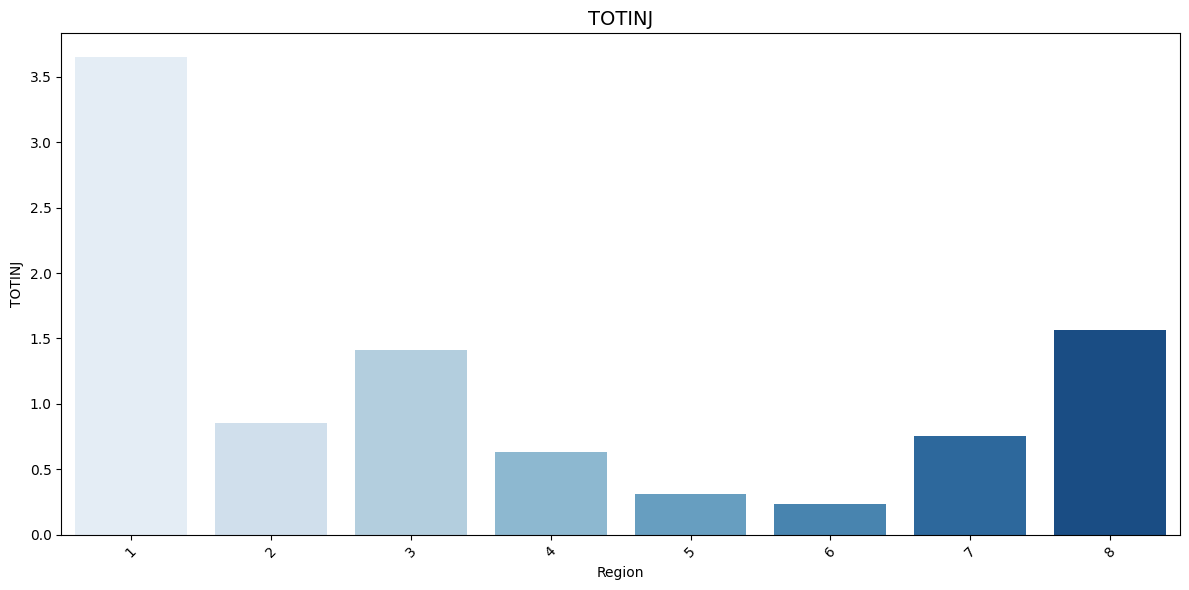

<ipython-input-22-500329ebb9a9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='REGION', y='TOTKLD', ci=None, palette='Reds')
<ipython-input-22-500329ebb9a9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='REGION', y='TOTKLD', ci=None, palette='Reds')


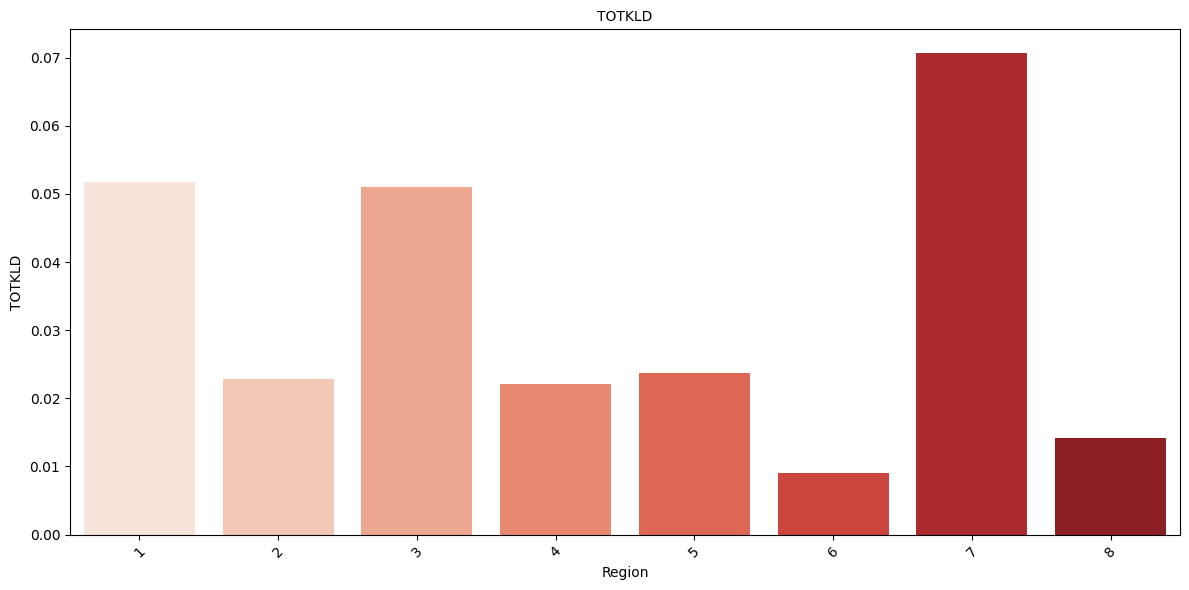

In [22]:
#5-7
#TOTINJ
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='REGION', y='TOTINJ', ci=None, palette='Blues')
plt.title('TOTINJ', fontsize=14)
plt.xlabel('Region', fontsize=10)
plt.ylabel('TOTINJ', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#TOTKLD
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='REGION', y='TOTKLD', ci=None, palette='Reds')
plt.title('TOTKLD', fontsize=10)
plt.xlabel('Region', fontsize=10)
plt.ylabel('TOTKLD', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

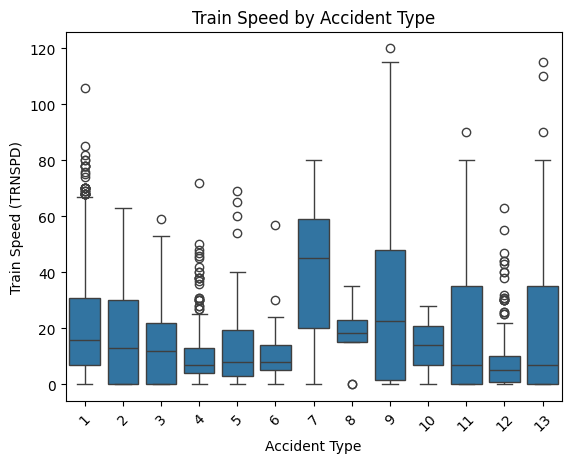

In [24]:
#8-9:
sns.boxplot(data=df, x='TYPE', y='TRNSPD')

plt.title('Train Speed by Accident Type')
plt.xlabel('Accident Type')
plt.ylabel('Train Speed (TRNSPD)')


plt.xticks(rotation=45)
plt.show()

In [26]:
#10:
mean_accdm = df['ACCDMG'].mean()
mean_accdm

715518.8735858984

In [27]:
#11:
max_inj = df['TOTINJ'].max()
max_inj

1000

In [29]:
#12:
injuries_by_month = df.groupby('IMO')['TOTINJ'].sum()
max_injuries_month = injuries_by_month.idxmax()

print(max_injuries_month)

1


In [30]:
#13:
max_injuries_row = df.loc[df['TOTINJ'].idxmax()]

max_injuries_cause = max_injuries_row['CAUSE']
print(max_injuries_cause)


max_injuries_type = max_injuries_row['TYPE']
print(max_injuries_type)

acc = max_injuries_row['ACCDMG']
print(acc)

weather = max_injuries_row['WEATHER']
print(weather)
#cloudy

cars = max_injuries_row['CARS']
print(cars)

T215
1
1327730
2
39


In [31]:
#14:
carshzd = max_injuries_row['CARSHZD']
print(carshzd)

11


In [32]:
#15:
total_deaths = df['TOTKLD'].sum()
total_deaths

218

In [34]:
#16
missing_values_trkdnsty = df['TRKDNSTY'].isnull().sum()
missing_values_trkdnsty

2311

In [37]:
#17
missing_values_ampm = df['AMPM'].isnull().sum()
print(missing_values_ampm)

average_tons = df['TONS'].mean()
print(average_tons)

correlation = df['ACCDMG'].corr(df['EQPDMG'])
print(correlation)

0
6890.948697711128
0.7589178191347181


In [40]:
#18:
df['NARR1_word_count'] = df['NARR1'].apply(lambda x: len(str(x).split()))
total_words = df['NARR1_word_count'].sum()
total_words


126450

In [43]:
#19:
df['word_count'] = df['NARR1'].apply(lambda x: len(str(x).split()))
average_word_count = df['word_count'].mean()
average_word_count


16.633780584056826

In [44]:
#20:
first_narrative = str(df['NARR1'].iloc[0])
capital_letters_count = sum(1 for char in first_narrative if char.isupper())
capital_letters_count


60

In [73]:
#21-22
import string
from collections import Counter
from nltk.corpus import stopwords
import re
import pandas as pd
import nltk
nltk.download('stopwords')

def clean_text_simple(text):
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    stop_words = {
        "a", "an", "the", "and", "or", "not", "is", "are", "was", "were",
        "in", "on", "at", "of", "to", "from", "with", "by", "for", "as"
    }
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

if 'NARR1' in df.columns:
    df['cleaned_narratives'] = df['NARR1'].dropna().apply(lambda x: clean_text_simple(str(x)))

    all_words = [word for sublist in df['cleaned_narratives'] for word in sublist]
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(20)

    print("Top 20 words:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
else:
    print("The column 'NARR1' does not exist in the dataset.")

Top 20 words:
train: 3292
derailed: 3239
cars: 3048
track: 2570
when: 1395
main: 1365
due: 1291
traveling: 1189
into: 1140
while: 1135
car: 984
2: 934
crew: 903
pulling: 809
1: 786
yard: 761
rail: 739
broken: 648
east: 640
mp: 602


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
#23:
derailment_accidents_count = df[df['TYPE'] == 1].shape[0]
derailment_accidents_count

6117

In [52]:
#24
derailments = df[df['TYPE'] == 1]
average_speed_derailments = derailments['TRNSPD'].mean()
average_speed_derailments

19.895046591466404

In [55]:
#25
columns_of_interest = ['ACCDMG', 'TRNSPD', 'TONS', 'TEMP', 'TYPE', 'CAUSE']

cleaned_data = df[columns_of_interest].dropna()

rows_dropped = len(df) - len(cleaned_data)
print(f"Number of rows dropped: {rows_dropped}")

numerical_columns = ['ACCDMG', 'TRNSPD', 'TONS', 'TEMP']
for column in numerical_columns:
    missing_values = df[column].isnull().sum()
    df[column] = df[column].fillna(df[column].mean())
    print(f"Imputed {missing_values} missing values in column: {column}")

categorical_columns = ['TYPE', 'CAUSE']
for column in categorical_columns:
    missing_values = df[column].isnull().sum()
    df[column] = df[column].fillna(df[column].mode()[0])
    print(f"Imputed {missing_values} missing values in column: {column}")



Number of rows dropped: 0
Imputed 0 missing values in column: ACCDMG
Imputed 0 missing values in column: TRNSPD
Imputed 0 missing values in column: TONS
Imputed 0 missing values in column: TEMP
Imputed 0 missing values in column: TYPE
Imputed 0 missing values in column: CAUSE
